In [4]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from invert import Invert

In [10]:
PATH_TRAIN = '../LPR44'
# PATH_TRAIN = '../ALPR(old)/train_data_old/single'
# PRE_TRAINED_PATH = opt.preTrainedPath
IMGH = 32
IMGW = 140
BATCH_SIZE = 64

In [11]:
#### data preparation & loading ####
train_transformer = transforms.Compose([
    transforms.Grayscale(),  
    transforms.RandomApply([Invert()], p=0.3),
#     transforms.Resize((IMGH, IMGW)),
    transforms.ToTensor()])  # transform it into a torch tensor


### torchvision.transforms.RandomApply(transforms, p=0.5)

In [12]:
class LPDataset(Dataset):
    """
    A standard PyTorch definition of Dataset which defines the functions 
    __len__ and __getitem__.
    """
    def __init__(self, path, cv_idx, transform):
        """
        Store the filenames of the jpgs to use. 
        Specifies transforms to apply on images.

        Args:
            path: (string) directory containing the dataset
            cv_idx: cross validation indices (training / validation sets)
            transform: (torchvision.transforms) transformation to apply on image
        """
#         self.filenames = [os.listdir(path)[i] for i in cv_idx]
#         self.filenames = [os.path.join(path, f) for f in self.filenames 
#                           if f.endswith('.jpg')]
        self.path = path
        self.dirs = [os.listdir(path)[i] for i in cv_idx]
    
        filenames = [os.path.splitext(directory)[0] for directory in self.dirs]
        
        self.labels = [file_name.split('_')[-1] for file_name in filenames]
#         self.labels = [filename.split('/')[-1].split('_')[-1].split('.')[0] 
#                        for filename in self.filenames]
        self.transform = transform

    def __len__(self):
        # return size of dataset
        return len(self.dirs)

    def __getitem__(self, idx):
        """
        Fetch index idx image and labels from dataset. 
        Perform transforms on image.

        Args:
            idx: (int) index in [0, 1, ..., size_of_dataset-1]

        Returns:
            image: (Tensor) transformed image
            label: corresponding label of image
        """
        image = Image.open(os.path.join(self.path, self.dirs[idx]))  # PIL image
        image = image.resize((16 * len(self.labels[idx]) - 4, 32))

        if image.size[0] != IMGW:
            image = ImageOps.expand(image, (0, 0, (IMGW - image.size[0]), 0), 
                                  fill='black')
        
        image = self.transform(image)
        return image, self.labels[idx]

(140, 32)
6


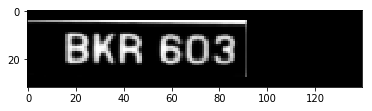

(140, 32)
6


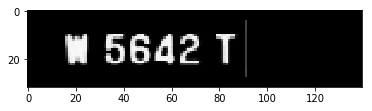

(140, 32)
6


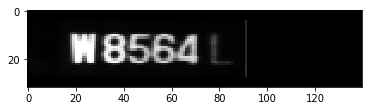

(140, 32)
5


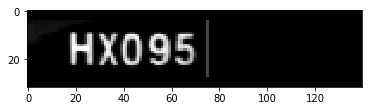

(140, 32)
6


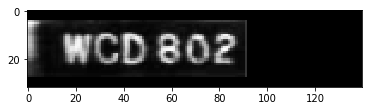

(140, 32)
7


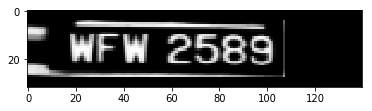

(140, 32)
7


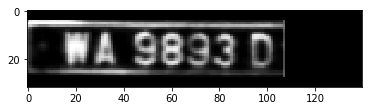

(140, 32)
7


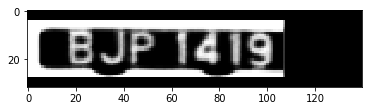

(140, 32)
7


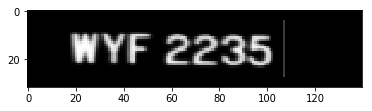

(140, 32)
7


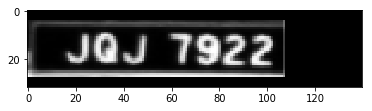

In [13]:
# plate = pd.DataFrame([], columns=['path', 'gTruth', 'length'])

for file in os.listdir(PATH_TRAIN)[:10]:
    
    filename, file_extension = os.path.splitext(file)
    gt = filename.split('_')[-1]
    
    img = Image.open(os.path.join(PATH_TRAIN, file))
    img = img.resize((16 * len(gt) - 4 ,32))
    if img.size[0] != 140:
        img = ImageOps.expand(img, (0, 0, (140-img.size[0]), 0), 
                              fill='black')
    
    print(img.size)
    plt.imshow(img)
    print(len(gt))
    plt.show()
    
#     plate = plate.append({'path': file,
#                           'gTruth': gt,
#                           'length': len(gt)},
#                            ignore_index=True)

In [14]:
n = range(len(os.listdir(PATH_TRAIN)))
train_idx, val_idx = train_test_split(n, train_size=0.8, test_size=0.2, random_state=88)

# train data
print("Checkpoint: Loading data")
train_loader = DataLoader(LPDataset(PATH_TRAIN, train_idx, train_transformer), 
                          batch_size=BATCH_SIZE, num_workers = 1, 
                          shuffle=True)
print("Checkpoint: Data loaded")

Checkpoint: Loading data
Checkpoint: Data loaded


In [15]:
trainiter = iter(train_loader)
imgs, labels = trainiter.next()

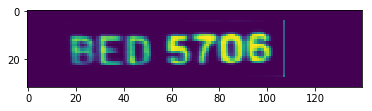

WXJ8471


In [17]:
plt.imshow(imgs[1][0])
plt.show()
print(labels[2])